# PRUDENTIAL LIFE INSURANCE ASSESSMENT - PROJECT REPORT
    

## PROBLEM STATEMENT

1.Underwriting Life Insurance is an antiquated and a laborious process. The insurance firms need to conduct intensive research and risk assessment of the customers before offering any products. The entire process takes over a month on average. As a result, Life Insurance statistics among US adults are below par. People need the right product but also a speedy and a convenient process.

2.So, the motivation behind the project is to develop a predictive model that accurately classifies risk with a more automated approach using machine learning multi-classification algorithms. Accurate risk assessment is very important for the insurance firms, since the downside risk is extremely large in case, they misclassify the customer.

3.Additionally, by performing advanced data analytics as done in the project, the firms can make it quicker and less labor intensive for new and existing customers to get an insurance quote while maintaining privacy boundaries.Lastly, enabling the process to be significantly streamlined using existing data points and assessment.

## DATASET

1.The data is provided by Prudential on Kaggle. Prudential is one of the largest insurance firms in North America. The data contains 79000 Rows and 127 Columns, with over a hundred variables describing attributes of life insurance applicants. 61 categorical, 61 numeric and 5 discrete variables.

2.The agenda is to predict the ‘Response’, which is the ordinal dependent variable, denoting the level of risk associated with a person’s chances of claiming his/her life insurance. The levels for ‘Response’ variable are: 1,2,3,4,5,6,7,8. For example, 8 means the highest level of risk and therefore an individual has maximum chances of claiming insurance from the company.

3.Overll, the dataset is comprehensive and justified for the prediction.

## DATA PROCESSING AND MODELS USED

1.Data engineering: <br>
 a) Missing values- Columns with over 70% of missing values were removed. For rest, imputed NAN with column median. <br>
 b) Creating Extra Features- Created extra column for the product of BMI and age because we felt that their product can be a   useful feature for the model to learn. Extracted character and numerical factors from the Product_Info_2 column. <br>
 c) One Hot Encoding- Converted categorical variables into numerical since categorical variables mask information in the dataset. As a result, total of 965 columns were created. <br>
 
From this step, two different approaches were considered. <br>
Approach 1: Used Principal Component Analysis to reduce the number of features to 120, which explain the 99% of variance explained. However, with PCA the features become less interpretable and later on we cannot refine the features used in the model. <br>
<br>
Approach 2: Kept the same number of features to maintain the interpretability. Removed highly correlated and variables with low variance. As a result used 702 columns to build the models.

2.Models Used: <br>
a) Multinomial Naive Bayes: For bayesian modeling, an important requirement is independent explanatory variables. Correlation matrix exhibits independent predictors. <br>
b) Multinomial Regression models: Used multinomial logistic regression to classify customers among the 8 risk classes. The reason behind using this model is to better explain the output to business stakeholders. It is easy to understand. <br>
c) Tree-based modeling: Decision Tree classification used to capture non-linear relationship among the features. Feature selection is another advantage of tree based modeling. <br>
d) Ensemble Techniques: Used Random Forests and Gradient Boosting to improve the model accuracy and reduce the issue of overfitting if it exists.

## ANALYSIS AND RESULTS

    # Results with Approach 1(PCA):
Models used 	    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;CV score&nbsp;&nbsp;&nbsp;&nbsp;  Test Accuracy <br>
Naive Bayes &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.4055&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.3955 <br>
Logistic regression	 &nbsp;&nbsp;                     0.4796 &nbsp;&nbsp;&nbsp;&nbsp;        0.4666 <br>
Decision Trees	       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.4284	 &nbsp;&nbsp;&nbsp;&nbsp;       0.4277 <br>
Random Forests	       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            0.4732	    &nbsp;&nbsp;&nbsp;&nbsp;      0.4602 <br>
Gradient Boosting	    &nbsp;&nbsp;&nbsp;            0.4567	     &nbsp;&nbsp;&nbsp;&nbsp;     0.4355 <br>

    # Results with Approach 2(Without PCA):
Models used	    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; CV score &nbsp;&nbsp;&nbsp;&nbsp;  Test Accuracy <br>
Naive Bayes &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.3793&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;0.3798 <br>
Logistic regression	 &nbsp;&nbsp;                         0.4519	   &nbsp;&nbsp;&nbsp;&nbsp;   0.4469  <br>
Decision Trees	     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   0.5031	     &nbsp;&nbsp;&nbsp;&nbsp; 0.5046  <br>
Random Forests	      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.5000	     &nbsp;&nbsp;&nbsp;&nbsp; 0.4978  <br>
Gradient Boosting	   &nbsp;&nbsp;&nbsp;               0.5004	    &nbsp;&nbsp;&nbsp;&nbsp;  0.4838  <br>

For Approach 1, Logistic Regression gives the best results. <br>
For Approach 2, Decision Trees gives the best results.      <br>
Cross-Validation and Hyperparameter tuning done using RandomizedSearchCV and GridSearchCV. <br>
For ensemble methods, oob_score is used for cross validation.

## CONCLUSION AND INSIGHTS

1.Feature Engineering: With a total of 127 predictors involved, feature engineering and implementation is challenging and decides the final output. Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the Features that are used.

2.Bayesian modeling: but Multinomial Naïve Bayes leads to the least accuracy even though all the features are independent.The model assumes the input it receives is coming from a text preprocessor. This implies that a lot of cleaning and preparation needs to be done further to improve the score.

3.Simple vs Complex models: As mentioned before,Logistic Regression and Decision Tree were the most accurate. Additionally, Actual variables gave better results than Principal Components. Simple models are transparent and can sometimes have better accuracy than ensemble techniques.

## THE MOST IMPORTANT LEARNING 

Till this project we believed that there is some hierarchy among algorithms in terms of accuracy. <br>
For example, gradient boosting gives you the best accuracy, followed by random forest, and in the end linear models. <br>
But that is not always true. There are datasets where a linear model can beat ensemble techniques. <br>

## CODE: Approach 1

In [4]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
os.chdir('C:\D Drive\MQF Subjects\Sem 2\ML\Project')

train=pd.read_csv('train.csv')
train['flag']='train'

test=pd.read_csv('test.csv')
test['Response']='NA'
test['flag']='test'

total=pd.concat([train,test])
total.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_47  Medical_Keyword_48  Response   flag  
0                   0                   0         8  train  
1                   0                   0         4  train  
2                   0                   0         8  train  
3                   0                   0         8  train  
4                   0                   0         8  train  

[5 rows x 129 columns]

# Missing Values Check

In [5]:
# Checking Missing Values
for i in total.columns:
    k = 0
    for j in range (len(total[i])):
        if str(total[i].values[j]) == "nan" :
            k = k+1
    if k != 0:
        print(str(i) + ': ' + str(k) + ' Missing records '+ str(round(k/len(total[i])*100,2))+ '% missing records')

Employment_Info_1: 22 Missing records 0.03% missing records
Employment_Info_4: 8916 Missing records 11.27% missing records
Employment_Info_6: 14641 Missing records 18.5% missing records
Insurance_History_5: 33501 Missing records 42.33% missing records
Family_Hist_2: 38536 Missing records 48.69% missing records
Family_Hist_3: 45305 Missing records 57.24% missing records
Family_Hist_4: 25861 Missing records 32.68% missing records
Family_Hist_5: 55435 Missing records 70.04% missing records
Medical_History_1: 11861 Missing records 14.99% missing records
Medical_History_10: 78388 Missing records 99.04% missing records
Medical_History_15: 59460 Missing records 75.13% missing records
Medical_History_24: 74165 Missing records 93.71% missing records
Medical_History_32: 77688 Missing records 98.16% missing records


# Treating Missing Values

## 1. Droping Features with >70% missing values

In [6]:
# 1. IMPUTATION
# Deleting columns with more than 70% NA values
total=total.drop(columns= ['Family_Hist_5','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32'])  

## 2. Imputing missing values with median

In [7]:
# Employement_Info_1,4,6  & Insurance_History_5, Family_Hist_2,3,4 are continuous 
# variables. So replacing NA with median values.
total['Employment_Info_1'].fillna((total['Employment_Info_1'].median()),inplace=True)
total['Employment_Info_4'].fillna((total['Employment_Info_4'].median()),inplace=True)  
total['Employment_Info_6'].fillna((total['Employment_Info_6'].median()),inplace=True)
total['Insurance_History_5'].fillna((total['Insurance_History_5'].median()),inplace=True)
total['Family_Hist_2'].fillna((total['Family_Hist_2'].median()),inplace=True)
total['Family_Hist_3'].fillna((total['Family_Hist_3'].median()),inplace=True)
total['Family_Hist_4'].fillna((total['Family_Hist_4'].median()),inplace=True)

# Medical_History_1 is a discrete column. Also imputed with median.
total['Medical_History_1'].fillna((total['Medical_History_1'].median()),inplace=True)

## Creating New Variables

In [8]:
# 2. CREATING EXTRA VARIABLES
# Product Info2 contains character and number. So need to separate that into 2 columns
# Then factorize each of the 3 columns.
total['Product_Info_2_char'] = total.Product_Info_2.str[0]
total['Product_Info_2_num'] = total.Product_Info_2.str[1]

total['Product_Info_2'] = pd.factorize(total['Product_Info_2'])[0]
total['Product_Info_2_char'] = pd.factorize(total['Product_Info_2_char'])[0]
total['Product_Info_2_num'] = pd.factorize(total['Product_Info_2_num'])[0]
  
# Add another features, as it is important.
total['BMI_Age'] = total['BMI'] * total['Ins_Age']

med_keyword_columns = total.columns[total.columns.str.startswith('Medical_Keyword_')]
total['Med_Keywords_Count'] = total[med_keyword_columns].sum(axis=1)

# One Hot Encoding to convert Categorical Features to Numerical Features

In [9]:
# Converting categorical to numerical 
df= ["Product_Info_1", "Product_Info_2", "Product_Info_3", "Product_Info_5", "Product_Info_6", 
                              "Product_Info_7", "Employment_Info_2", "Employment_Info_3","Employment_Info_5", "InsuredInfo_1", "InsuredInfo_2",
                              "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7", "Insurance_History_1", 
                              "Insurance_History_2", "Insurance_History_3","Insurance_History_4", "Insurance_History_7",
                              "Insurance_History_8", "Insurance_History_9","Family_Hist_1", "Medical_History_2", "Medical_History_3", "Medical_History_4", "Medical_History_5", "Medical_History_6", 
                              "Medical_History_7", "Medical_History_8", "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14", 
                              "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",
                              "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26", "Medical_History_27", "Medical_History_28",
                              "Medical_History_29", "Medical_History_30", "Medical_History_31", "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",
                              "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41", 'Product_Info_2_char','Product_Info_2_num']

converted_data_1=pd.get_dummies(total, prefix_sep="_", columns= df)

train_data=converted_data_1[converted_data_1['flag']=='train']
test_data=converted_data_1[converted_data_1['flag']=='test']

# Pricncipal Component Analysis

In [10]:
# data is already normalized, so pply PCA
train_data_y= train_data['Response']
train_data_X=train_data.drop(columns=['Response','flag','Id'])
test_data_X=test_data.drop(columns=['Response','flag','Id'])
train_data_y=train['Response']

import numpy as np
from sklearn.decomposition import PCA
pca=PCA(n_components=120)
pca.fit(train_data_X)

train_new=pca.transform(train_data_X)
test_new=pca.transform(test_data_X)


#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Model 1: Multinomial Naive Bayes

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV , cross_val_score , train_test_split

In [11]:
# Multinomial NB
# Applied on the original data set since NB cannot have negative input

mnb = MultinomialNB()
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train_data_X, train_data_y, random_state=1)
mnb.fit(X_train_1, y_train_1)
mnb_pred= mnb.predict(X_test_1)
accuracy = accuracy_score(y_test_1, mnb_pred)
print("The accuracy score of the Multinomial Model is ", accuracy)
cv_mnb = np.mean(cross_val_score(mnb, X_train_1, y_train_1, cv=5))
print("The cross-validation score of the Multinomial Naive Bayes Model with 5 folds is ", cv_mnb)

The accuracy score of the Multinomial Model is  0.395594773002829
The cross-validation score of the Multinomial Naive Bayes Model with 5 folds is  0.4000452916920902


# Model 2: Logistic Regression

## 2.1 Logistic Regression without Parameter Tuning

In [12]:
# Logistic regression

# Splitting training data into train and test data since we don't have test response
X_train, X_test, y_train, y_test = train_test_split(train_new, train_data_y, random_state=1)

logreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
logreg_pred=logreg.predict(X_test)
accuracy = accuracy_score(y_test, logreg_pred)
print("The accuracy score of the Multinomial Logistic Regression without parameter tunig is ", accuracy)
cv_logreg = np.mean(cross_val_score(logreg, X_train, y_train, cv=5))
print("The cross validation score of the Multinomial Logistic Regression without parameter tunig is ", cv_logreg)

The accuracy score of the Multinomial Logistic Regression without parameter tunig is  0.4703623871749966
The cross validation score of the Multinomial Logistic Regression without parameter tunig is  0.47663731458476316


## 2.2 Logistic Regression with Parameter Tuning using Grid Search CV 

In [49]:
# Hyperparameter Tuning
# Setup the hyperparameter grid
c_space = np.logspace(4, 5,15)
param_grid = {'C': c_space}
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832495}
Best score is 0.47977994835522625


In [50]:
cv_logregCV = np.mean(cross_val_score(logreg_cv, X_train, y_train, cv=5))
print("The cross-validation score of the Tuned Logistic Multinomial Regression with 5 folds is ", cv_logregCV)
logreg_cv_pred=logreg_cv.predict(X_test)
accuracy = accuracy_score(y_test, logreg_cv_pred)
print("The accuracy score of the Multinomial Logistic Regression with parameter tunig is ", accuracy)

The cross-validation score of the Tuned Logistic Multinomial Regression with 5 folds is  0.4796003356592631
The accuracy score of the Multinomial Logistic Regression with parameter tunig is  0.4665903273609053


# Model 3: Decision Trees

## 3.1 Decision Tree Classifier without parameter tuning

In [23]:
tree=DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test,tree_pred)
print("The accuracy score of the Decision Tree without parameter tunig is ", accuracy)
#CROSS VALIDATION ACCURACY
cv_tree = cross_val_score(tree, X_train, y_train, cv=5)
print("The Cross Validation Score of the Decision Tree without parameter tuning is ", cv_tree)

0.42846557995419643

## 3.2 Decision Tree Classifier with parameter tuning using Randomized Search CV

In [19]:
#  Parameter Tuning using RandomizedSearchCV
# min_samples_split: The minimum number of samples required to split an internal node.
# max_depth: The maximum depth of the tree.
# min_samples_leaf: The minimum number of samples required to be at a leaf node
# max_features: The number of features to consider when looking for the best split

Dtree=DecisionTreeClassifier()

param_dist = {"max_depth": [2, 10],
              "min_samples_split": randint(2,10),
              "max_features": randint(1, 100),
              "min_samples_leaf": randint(1, 20),
              "criterion": ["gini", "entropy"]}

tree_cv = RandomizedSearchCV(Dtree, param_dist, cv=5)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

# Fit it to the data with the model that has the best score
tree_cv.fit(X_train, y_train)
tree_cv_pred = tree_cv.predict(X_test)
accuracy = accuracy_score(y_test, tree_cv_pred)
print("The accuracy of the Decision Tree Classsifier with parameters of Best Score model is ",accuracy)

0.4277246396335713

In [24]:
# Plot decision tree
export_graphviz(Dtree, out_file='tree1.dot')
# Confusion Matrix, Classification_report
table1=pd.DataFrame(confusion_matrix(y_test, tree_cv_pred))

In [25]:
table1

0    1   2  3    4     5    6     7
0  166  222   3  1  139   445  136   490
1  167  275   3  1  185   438  104   463
2   12   11   5  2   54    87    8    81
3   10    6   1  0    6   127   13   196
4   76  132  11  2  401   370   84   285
5  124  131   6  2  200  1130  193   985
6   42   53   1  0   63   508  314  1015
7   35   29   2  4   53   580   99  4059

# Model 4: Random Forest Classifier

## 4.1 Random Forest Classifier without parameter tuning

In [15]:
rforest=RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 32, 
                              min_samples_leaf= 2, min_samples_split= 2, 
                              n_estimators= 182, oob_score=True)

rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
accuracy = accuracy_score(y_test, rforest_pred)
print("The accuracy score for Random Forest Classifier without parameter tuning is ", accuracy)
print("The Out of bag score for Random Forest Classifier without parameter tuning is ", rforest.oob_score_)

The accuracy score for Random Forest Classifier without parameter tuning is  0.4680722080021555
The Out of bag score for Random Forest Classifier without parameter tuning is  0.472010778039744


In [17]:
pd.DataFrame(confusion_matrix(y_test,rforest_pred))

0    1  2  3    4     5    6     7
0  152  244  0  0  104   483   99   520
1   74  396  0  0  152   461   72   481
2    5   14  0  0   47    98   10    86
3    4    1  0  0    2   123   14   215
4   35  136  0  0  429   403   54   304
5   54  136  0  0  139  1278  134  1030
6   23    5  0  0   40   513  333  1082
7   10    5  0  0   32   411   42  4361

## 4.2 Random Forest Classifier with parameter tuning

In [ ]:
#  RandomForest
model4 = RandomForestClassifier()
#model4.fit(X_train, y_train)

param_dist = {"max_depth": [2, 10],
              "min_samples_split": randint(2,10),
              "max_features": randint(1, 40),
              "min_samples_leaf": randint(1, 20),
              "criterion": ["gini", "entropy"],
              "n_estimators":randint(100,200)}

# Instantiate the RandomizedSearchCV object: tree_cv
RF_cv = RandomizedSearchCV(model4, param_dist, cv=5)
RF_cv.fit(X_train, y_train)
print("Tuned RF Parameters: {}".format(RF_cv.best_params_))
print("Best score is {}".format(RF_cv.best_score_))
RF_cv_pred = RF_cv.predict(X_test)
accuracy = accuracy_score(y_test, RF_cv_pred)
print("The accuracy score for Random Forest Classifier with parameter tuning is ", accuracy)

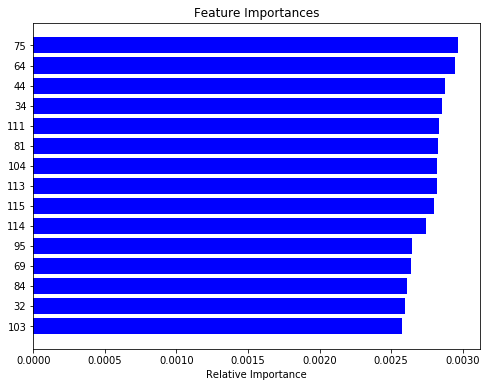

In [16]:
# features importance would be difficult in RF PCA to explain
Xdf=pd.DataFrame(X_train)
features = Xdf.columns
importances = rforest.feature_importances_
indices = np.argsort(importances)
indices1= indices[0:15]   # Top 15 features
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Plotting decision trees for RF
from sklearn.tree import export_graphviz
Xdf=pd.DataFrame(X_train)
features = Xdf.columns
estimator=model5.estimators_[1]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = Xdf.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Put the code in the webpage to get the image

# Model 5: Gradient Boosting Classifier

In [14]:
gb = GradientBoostingClassifier(min_samples_split = 100,learning_rate = 1, max_features="auto", max_depth = 3, random_state = 0)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, gb_pred)
print("The accuracy of the Gradient Boosting Classsifier is ",accuracy)
gb_cv = cross_val_score(gb,X_train,y_train,cv=5)
print("The Cross-Validation Score for Gradient Boosting Classifier with 5 folds is ", gb_cv)

The accuracy of the Gradient Boosting Classsifier is  0.43553819210561767
The Cross-Validation Score for Gradient Boosting Classifier with 5 folds is  [0.43968129 0.4584643  0.44975862 0.45670971 0.44822552]


# Code: Approach 2

In [58]:
import pandas as pd
Data = pd.read_csv("/Users/anityagupta/Documents/Semester 2/Statstics and Machine Learning/Data ML/train.csv")

# Missing Values Check

In [59]:
for i in Data.columns:
    k = 0
    u = 0
    for j in range (len(Data[i])):
        if str(Data[i].values[j]) == "nan" :
            k = k+1
    if k != 0:
        print(str(i) + ': ' + str(k) + ' Missing records '+ str(round(k/len(Data[i])*100,2))+ '% missing records')

Employment_Info_1: 19 Missing records 0.03% missing records
Employment_Info_4: 6779 Missing records 11.42% missing records
Employment_Info_6: 10854 Missing records 18.28% missing records
Insurance_History_5: 25396 Missing records 42.77% missing records
Family_Hist_2: 28656 Missing records 48.26% missing records
Family_Hist_3: 34241 Missing records 57.66% missing records
Family_Hist_4: 19184 Missing records 32.31% missing records
Family_Hist_5: 41811 Missing records 70.41% missing records
Medical_History_1: 8889 Missing records 14.97% missing records
Medical_History_10: 58824 Missing records 99.06% missing records
Medical_History_15: 44596 Missing records 75.1% missing records
Medical_History_24: 55580 Missing records 93.6% missing records
Medical_History_32: 58274 Missing records 98.14% missing records


# Treating Missing Values

## 1. Dropping Features with >70% missing Values

In [60]:
Data = Data.drop(columns=["Id","Family_Hist_5",'Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32'])

## 2. Imputing Missing Values with Median

In [61]:
for i in Data.columns:
    k = 0
    u = 0
    for j in range (len(Data[i])):
        if str(Data[i].values[j]) == "nan" :
            k = k+1
    if k != 0:
        Data[str(i)].fillna((Data[str(i)].median()),inplace=True)

# Creating New Variables

In [62]:
Data['Product_Info_2_char']=Data.Product_Info_2.str[0]
Data['Product_Info_2_num']=Data.Product_Info_2.str[1]

Data['Product_Info_2']=pd.factorize(Data['Product_Info_2'])[0]
Data['Product_Info_2_char']=pd.factorize(Data['Product_Info_2_char'])[0]
Data['Product_Info_2_num']=pd.factorize(Data['Product_Info_2_num'])[0]

Data['BMI_Age']=Data['BMI']*Data['Ins_Age']

med_keyword_columns = Data.columns[Data.columns.str.startswith('Medical_Keyword_')]
Data['Med_Keywords_Count']=Data[med_keyword_columns].sum(axis=1)

# Correlation Matrix

In [63]:
corr = Data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## Dropping Variables with >0.8 Correlation

In [64]:
corr_matrix = Data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
drop = to_drop[1:11]
Data = Data.drop(columns=drop)

# Classifying the Data Into Categorical and Non-Categorical for One Hot Encoding 

In [65]:
CATEGORICAL_COLUMNS = ["Product_Info_1", "Product_Info_2",'Product_Info_2_char','Product_Info_2_num', "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3",\
                       "Insurance_History_8", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", \
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35",  "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]

# Variation Method For Feature Removal 

In [74]:
def Variation_Check(data):
    ncols = len(data.columns)
    no = 1
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        k = sum(vals)
        temp = []
        for i in range (len(vals)):
            t = round(vals[i]*100/k,2)
            temp.append(t)
        if max(temp) >= 80.00:
            no = no +1
            data.drop(col, axis=1, inplace=True)
            if col in CATEGORICAL_COLUMNS:
                CATEGORICAL_COLUMNS.remove(col)
Variation_Check(Data)

# Splitting Data into Trainning and Test Set

In [75]:
converted_data = pd.get_dummies(Data, prefix_sep="_", columns=CATEGORICAL_COLUMNS)
converted_y = converted_data['Response']
converted_data = converted_data.drop(columns=["Response"])
X_train, X_test,Y_train, Y_test = train_test_split(converted_data,converted_y, random_state = 1)

# Model 1: Multinomial Naive Bayes

In [76]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb_pred = mnb.predict(X_test)
accuracy = accuracy_score(Y_test, mnb_pred)
print("The accuracy score of the Multinomial Naive Bayes Model is ", accuracy )
cv_mnb = np.mean(cross_val_score(mnb,X_train,Y_train,cv=5))
print("The cross-validation score of the Multinomial Naive Bayes Model with 5 folds is ", cv_mnb)

The accuracy score of the Multinomial Naive Bayes Model is  0.37983295163680453
The cross-validation score of the Multinomial Naive Bayes Model with 5 folds is  0.3793641348321868


# Model 2: Logistic Regression

In [77]:
logreg = LogisticRegression( C=3.72,  solver = 'lbfgs', multi_class= 'multinomial')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
accuracy = accuracy_score( Y_test,Y_pred)
print("The accuracy score of the Multinomial Logistic Regression without parameter tunig is ", accuracy)
cv_logreg = np.mean(cross_val_score(logreg,X_train,Y_train,cv=5))
print("The cross-validation score of the Logistic Multinomial Regression with 5 folds is ", cv_logreg)

The accuracy score of the Multinomial Logistic Regression without parameter tunig is  0.4469217297588576
The cross-validation score of the Logistic Multinomial Regression with 5 folds is  0.4519589482287406


# Model 3: Decison Tree

In [79]:
clf_gini = DecisionTreeClassifier(criterion = 'gini',max_depth =10,min_samples_split = 1000,random_state=0)
clf_gini.fit(X_train, Y_train)
clf_gini_pred = clf_gini.predict(X_test)
accuracy = accuracy_score( Y_test,clf_gini_pred)
print("The accuracy score of the Decision Tree Classifier without parameter tunig is ", accuracy )
cv_clf_gini = np.mean(cross_val_score(clf_gini,X_train,Y_train,cv=5))
print("The cross-validation score of the Decison Tree with 5 folds is ", cv_clf_gini)

The accuracy score of the Decision Tree Classifier without parameter tunig is  0.5046477165566483
The cross-validation score of the Decison Tree with 5 folds is  0.503177674597324


# Model 4: Random Forest Classifier

In [80]:
rforest = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,
                                          min_samples_split = 0.05, min_samples_leaf = 0.001, oob_score=True)

rforest.fit(X_train, Y_train)
rforest_pred = rforest.predict(X_test)
accuracy = accuracy_score( Y_test,rforest_pred)
print( "The accuracy score of the Random Forest Classifier without parameter tunig is ", accuracy)
cv_rforest= np.mean(cross_val_score(rforest,X_train,Y_train,cv=5))
print("The cross-validation score of the Random Forest Classifier with 5 folds is ", cv_rforest)

The accuracy score of the Random Forest Classifier without parameter tunig is  0.49784453724909067
The cross-validation score of the Random Forest Classifier with 5 folds is  0.5000565462481031


## Feature Importance Plot of Random Forest Classifer

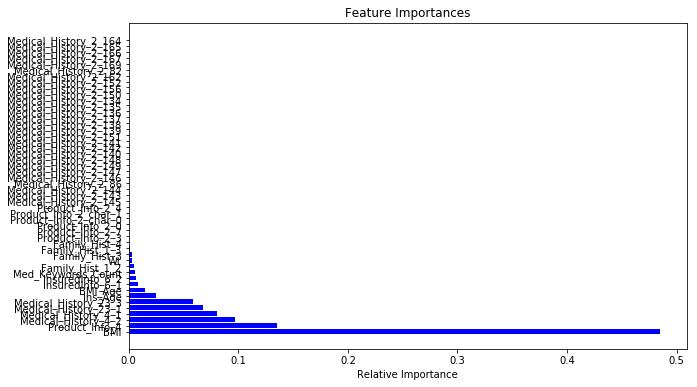

In [83]:
features = X_train.columns
importances = rforest.feature_importances_
indices = np.argsort(importances)
indices1= indices[652:702][::-1]   # Top 15 features
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()

# Model 5: Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(min_samples_split = 100,learning_rate = 1, max_features="auto", max_depth = 3, random_state = 0)
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
gb.score(X_train, Y_train)
accuracy = accuracy_score( Y_test,gb_pred)
print( "The accuracy score of the Gradient Boosting Classifier is ", accuracy)
cv_gb = np.mean(cross_val_score(gb,X_train,Y_train,cv=5))
print("The cross-validation score of the Grandient Boosting Classifier with 5 folds is ", cv_gb)

## Feature Importance Plot of Gradient Boosting Classifier

In [ ]:
features = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)
indices1= indices[680:702][::-1]   # Top 15 features
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices1)), importances[indices1], color='b', align='center')
plt.yticks(range(len(indices1)), [features[i] for i in indices1])
plt.xlabel('Relative Importance')
plt.show()